Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.3  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **4. studenog 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline
import scipy as sp

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [3]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

In [4]:
# Vaš kôd ovdje
clf = RidgeClassifier(alpha=0).fit(seven_X, seven_y)
y_predict = clf.predict(seven_X)
print (accuracy_score(y_predict,seven_y))



1.0


Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

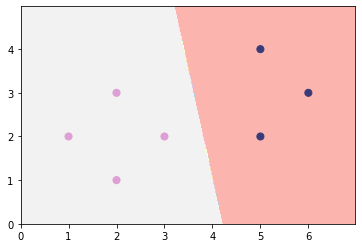

In [5]:
# Vaš kôd ovdje

modelLR = LinearRegression()
modelLR.fit(seven_X, seven_y)


mlutils.plot_2d_clf_problem(seven_X, seven_y, h=lambda x: modelLR.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [6]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

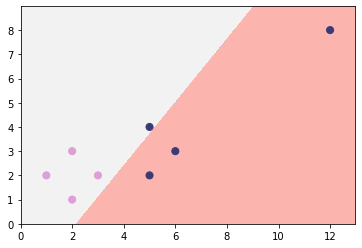

In [7]:
# Vaš kôd ovdje
modelO = LinearRegression()
modelO.fit(outlier_X, outlier_y)

mlutils.plot_2d_clf_problem(outlier_X, outlier_y, h=lambda x: modelO.predict(x) >= 0.5)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [8]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

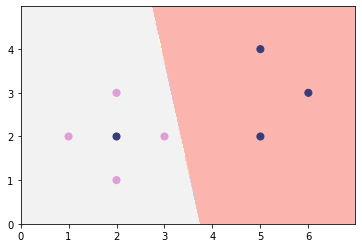

In [9]:
# Vaš kôd ovdje

modelO.fit(unsep_X, unsep_y)
mlutils.plot_2d_clf_problem(unsep_X, unsep_y, h=lambda x: modelO.predict(x) >= 0.5)



**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

In [10]:
from sklearn.datasets import make_classification

[2 1 2 1 0 1 0 0 2 2 2 2 2 2 1 2 2 1 1 1 1 1 0 0 1 1 0 1 2 2 1 0 0 1 2 2 0
 2 0 2 1 0 1 2 1 1 1 1 0 1 0 1 2 1 1 1 2 0 0 0 2 2 2 2 2 1 0 0 2 0 1 0 2 1
 0 0 2 0 0 1 1 0 2 0 2 0 2 2 0 0 2 1 0 0 0 0 2 1 1 2]


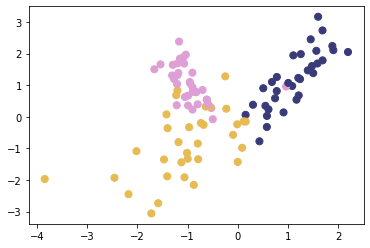

In [11]:
# Vaš kôd ovdje
data = make_classification(n_features=2, n_classes=3, n_clusters_per_class=1, 
                           n_informative=2, n_redundant=0, n_repeated=0)
mlutils.plot_2d_clf_problem(data[0],data[1])
print (data[1])












Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

In [12]:
# Vaš kôd ovdje
y0 = [1 if y==0 else 0 for y in data[1]]
h0 = LinearRegression()
h0.fit(data[0], y0)

y1 = [1 if y==1 else 0 for y in data[1]]
h1 = LinearRegression()
h1.fit(data[0],y1)

y2 = [1 if y==2 else 0 for y in data[1]]
h2 = LinearRegression()
h2.fit(data[0],y2)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
def predict(X):
    p1 = h0.predict(X)
    p2 = h1.predict(X)
    p3 = h2.predict(X)
    return np.array([np.argmax([p1[i],p2[i],p3[i]]) for i in range(len(p1))])

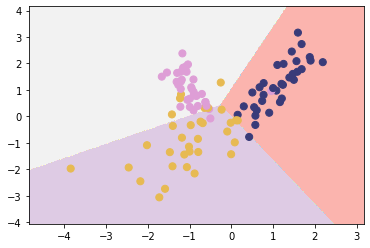

In [14]:
mlutils.plot_2d_clf_problem(data[0], data[1], h=lambda x: predict(x))

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

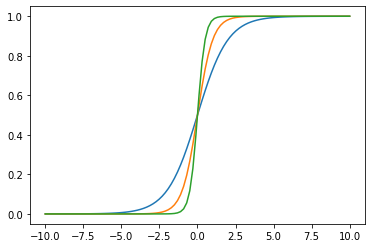

In [15]:
# Vaš kôd ovdje

def sigm(x, a=1):
    return 1/(1+exp(-a*x))

x = np.linspace(-10,10,100)
for a in [1,2,4]:
    plt.plot(x, sigm(x,a))
    


**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [16]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures


def lr_h(x, w, adj = False):
    if adj:
        return sigm(np.dot(x, w[1:]) + w[0])
    else:
        return sigm(np.dot(x,w))


def cross_entropy_error(X, y, w, adj=False):
    n = X.shape[0]
    error = 0
    for i in range(n):
        h_x = lr_h(X[i],w, adj)
        error += -y[i] * np.log(h_x) - (1 - y[i]) * np.log(1 - h_x)
        
    return error/n


In [17]:
def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    n = X.shape[1]
    
    poly = PolynomialFeatures(degree=1)
    X = poly.fit_transform(X)
    
    w = np.array([0]*(n+1), dtype=float)
    ws = []
    
    if trace:
        ws.append(w.copy())
    
    prev_error = cross_entropy_error(X, y, w)
    for i in range(max_iter):
        
        h = lr_h(X, w)
        delta_w = np.dot(h-y, X)
            
        w[0] = w[0] - eta*delta_w[0]
        w[1:] = w[1:]*(1 - eta*alpha) - eta*delta_w[1:]
        if trace:
            ws.append(w.copy())
        
        curr_error = cross_entropy_error(X, y, w)
        if prev_error-curr_error < epsilon:
            break
        prev_error = curr_error
        
    if trace:
        return w, ws
    else :
        return w

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

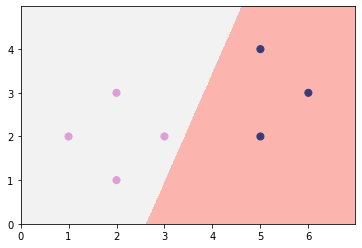

In [18]:
w = lr_train(seven_X, seven_y)

mlutils.plot_2d_clf_problem(seven_X, seven_y,
                            h=lambda x : np.array([1 if lr_h(x, w, adj=True) >= 0.5 else 0]))


**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

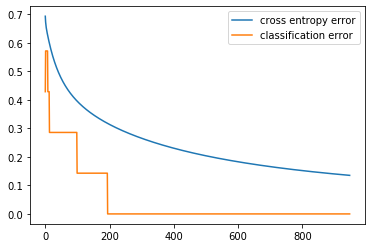

In [19]:
# Vaš kôd ovdje

w, ws = lr_train(seven_X, seven_y, trace=True)
lr = [0.005,0.01, 0.05, 0.1]
cross_e = []
class_e = []

for i in range(len(ws)):
    cross_e.append(cross_entropy_error(seven_X, seven_y, ws[i], adj=True))
    h = lr_h(seven_X, ws[i], adj=True)
    class_e.append(1-accuracy_score(seven_y, [1 if h[j] >= 0.5 else 0 for j in range(len(h))]))
                   
plt.plot(range(len(ws)), cross_e, label='cross entropy error')
plt.plot(range(len(ws)), class_e, label='classification error')
plt.legend();


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

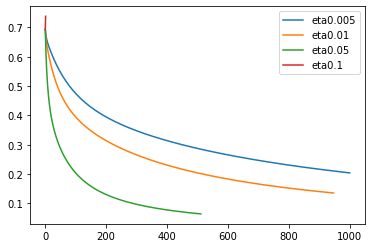

In [20]:
max_iter = 1000
for n in lr:
    w, ws= lr_train(seven_X, seven_y, max_iter=max_iter, eta=n, trace=True)
    cross_e = []
    for i in range(len(ws)):
        cross_e.append(cross_entropy_error(seven_X, seven_y, ws[i],adj=True))
        
    plt.plot(range(len(ws)),cross_e, label="eta"+ str(n))
plt.legend()

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

In [21]:
from sklearn.linear_model import LogisticRegression

C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


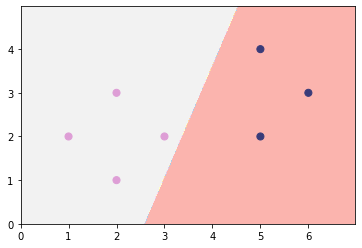

In [22]:
# Vaš kôd ovdje
model = LogisticRegression(max_iter=1000,C=10)
model.fit(seven_X, seven_y)

mlutils.plot_2d_clf_problem(seven_X, seven_y, lambda x : model.predict(x) >= 0.5)


## 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


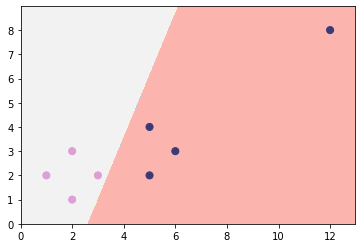

In [23]:
# Vaš kôd ovdje
# Vaš kôd ovdje
model = LogisticRegression(max_iter=1000,C=10)
model.fit(outlier_X, outlier_y)

mlutils.plot_2d_clf_problem(outlier_X, outlier_y, lambda x : model.predict(x) >= 0.5)


#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


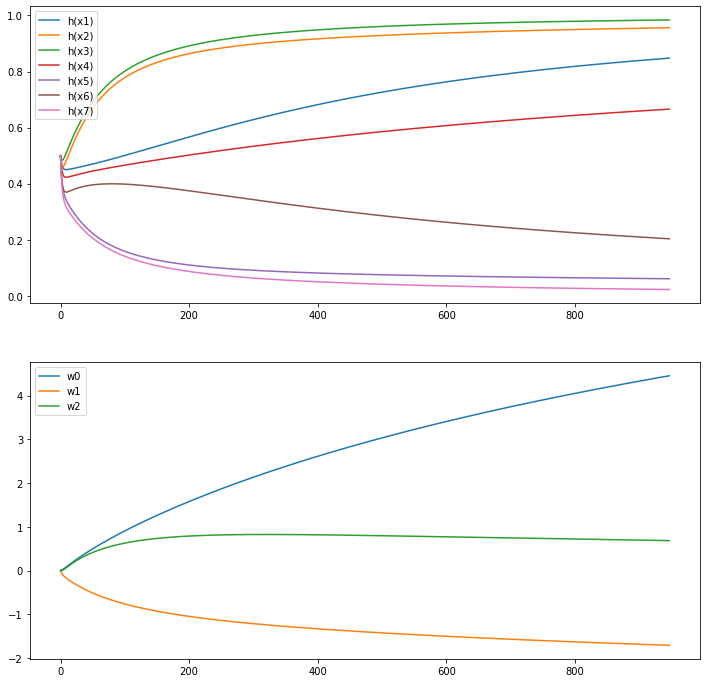

In [24]:
# Vaš kôd ovdje
w, ws = lr_train(seven_X, seven_y, trace=True)

plt.figure(figsize=(12,12))

n = len(seven_X)
m = len(ws)
h_o = np.zeros(shape=(n, len(ws)))

w0 = []
w1 = []
w2 = []    


for i in range(m):
    for j in range(n):
        h_o[j,i] = lr_h(seven_X[j], ws[i], adj=True)
    w0.append(ws[i][0])
    w1.append(ws[i][1])
    w2.append(ws[i][2])
    
plt.subplot(2, 1, 1)
for i in range(n):
    plt.plot(range(m), h_o[i], label='h(x'+str(i+1)+')')
plt.legend();

plt.subplot(2, 1, 2)
plt.plot(range(m), w0, label='w0')
plt.plot(range(m), w1, label='w1')
plt.plot(range(m), w2, label='w2')
plt.legend();
    


#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

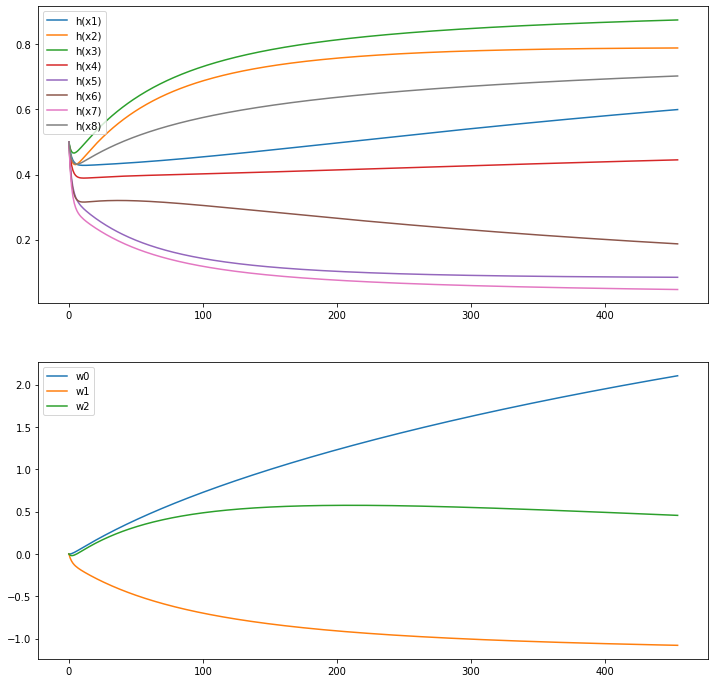

In [25]:
# Vaš kôd ovdje
# Vaš kôd ovdje
w, ws = lr_train(unsep_X, unsep_y, trace=True)

plt.figure(figsize=(12,12))

n = len(unsep_X)
m = len(ws)
h_o = np.zeros(shape=(n, len(ws)))

w0 = []
w1 = []
w2 = []    


for i in range(m):
    for j in range(n):
        h_o[j,i] = lr_h(unsep_X[j], ws[i], adj=True)
    w0.append(ws[i][0])
    w1.append(ws[i][1])
    w2.append(ws[i][2])
    
plt.subplot(2, 1, 1)
for i in range(n):
    plt.plot(range(m), h_o[i], label='h(x'+str(i+1)+')')
plt.legend();

plt.subplot(2, 1, 2)
plt.plot(range(m), w0, label='w0')
plt.plot(range(m), w1, label='w1')
plt.plot(range(m), w2, label='w2')
plt.legend();
    


### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [26]:
from numpy.linalg import norm

C:\Users\Korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
C:\Users\Korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
C:\Users\Korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a p

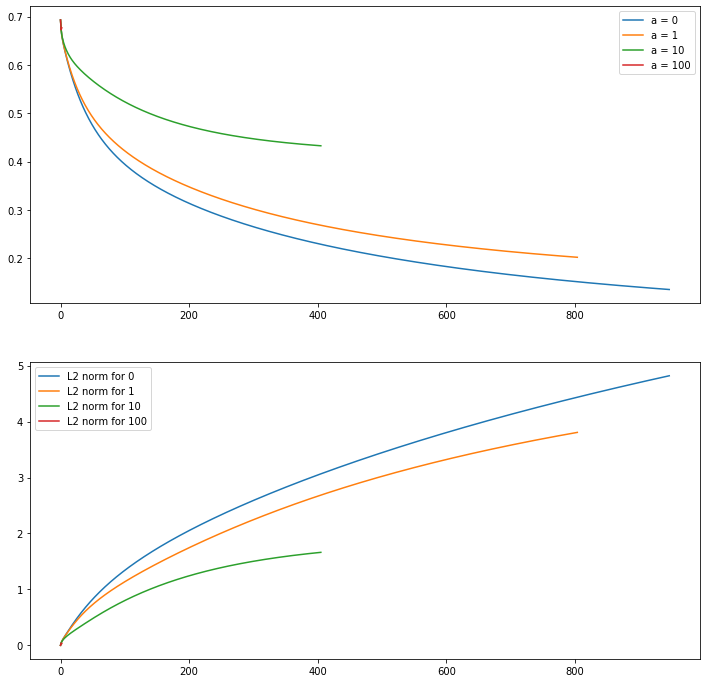

In [27]:
# Vaš kôd ovdje
plt.figure(figsize=(12,12))

for idx, a in enumerate([0,1,10,100]):
    w, ws = lr_train(seven_X, seven_y, alpha=a, trace=True)
    cross_e = []
    L2_n = []
    for i in range(len(ws)):
        cross_e.append(cross_entropy_error(seven_X, seven_y, ws[i], adj=True))
        L2_n.append(norm(ws[i]))
    
    plt.subplot(2,1,1)
    plt.plot(range(len(ws)),cross_e, label="a = " + str(a))
    plt.legend();
    
    plt.subplot(2,1,2)
    plt.plot(range(len(ws)), L2_n, label="L2 norm for "+ str(a))
    plt.legend();

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

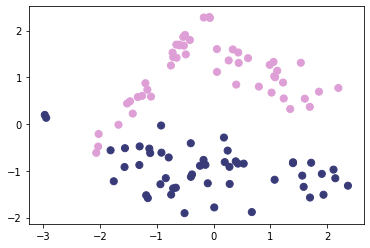

In [28]:
from sklearn.preprocessing import PolynomialFeatures

X, y = make_classification(n_features = 2, n_classes = 2, n_clusters_per_class=2, n_redundant=0, n_repeated=0)
mlutils.plot_2d_clf_problem(X, y)
    

C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


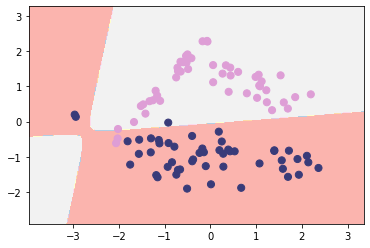

In [29]:
# Vaš kôd ovdje
model = LogisticRegression(C=10)
poly = PolynomialFeatures(2)
Xp = poly.fit_transform(X)
model.fit(Xp,y)
mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x)))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?

C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


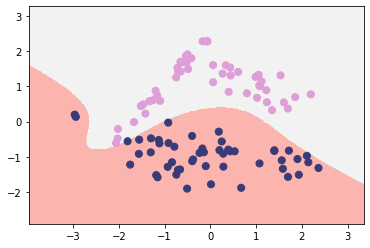

In [30]:
# Vaš kôd ovdje
model = LogisticRegression(C=10)
poly = PolynomialFeatures(3)
Xp = poly.fit_transform(X)
model.fit(Xp,y)
mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x)))